# Possom - Regression

Source: https://www.kaggle.com/datasets/abrambeyer/openintro-possum

--- 

# Step 1: Import Data and Packages

In [20]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("possum.csv")

data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Check columns

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


### Check for missing data

In [22]:

# Check number of missing values
print("Count of na's:", data.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", data.isna().any(axis=1).sum())

Count of na's: 3
Cases with missing values: 3


### Drop NA's

In [23]:
data = data.dropna()

# Check number of missing values
print("Count of na's:", data.isnull().values.sum())

# Check number of rows with missing values
print("Cases with missing values:", data.isna().any(axis=1).sum())

Count of na's: 0
Cases with missing values: 0


### Train-Test Split

In [24]:
# import package
from sklearn.model_selection import train_test_split

# declare our X inputs and y outcomes
X = data.drop("taill", axis=1)
y = data["taill"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

X_train.shape =  (80, 13)
X_test.shape =  (21, 13)
y_train.shape =  (80,)
y_test.shape =  (21,)


### Check the training set

In [25]:
# combine the X_train and y_train into a dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# check records and features
print(training_set.shape)

(80, 14)


--- 

# Step 2: Exploratory Data Analysis


In [26]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Matrix Heatmap

<AxesSubplot:>

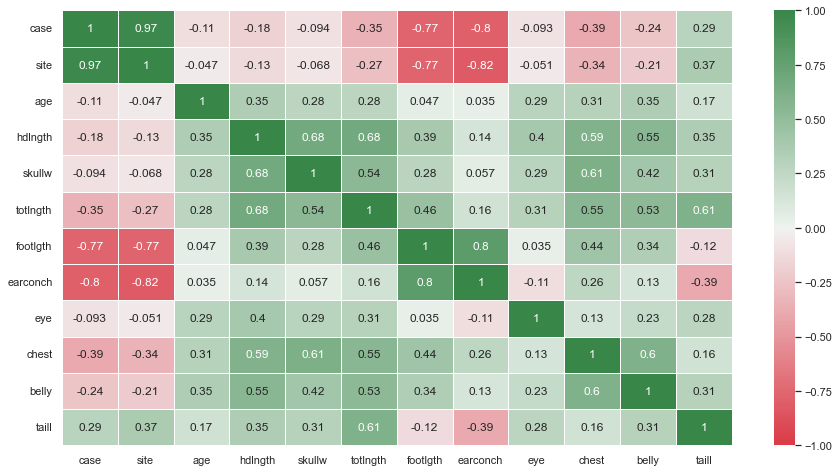

In [27]:
# calculate the correlation matrix
corr_matrix = training_set.corr()

# set larger plot size
sns.set(rc = {'figure.figsize':(15,8)})

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# plot the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, 
            vmax=1,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            center=0,
            linewidths=.5)

### Distributions

array([[<AxesSubplot:title={'center':'case'}>,
        <AxesSubplot:title={'center':'site'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hdlngth'}>,
        <AxesSubplot:title={'center':'skullw'}>,
        <AxesSubplot:title={'center':'totlngth'}>],
       [<AxesSubplot:title={'center':'footlgth'}>,
        <AxesSubplot:title={'center':'earconch'}>,
        <AxesSubplot:title={'center':'eye'}>],
       [<AxesSubplot:title={'center':'chest'}>,
        <AxesSubplot:title={'center':'belly'}>,
        <AxesSubplot:title={'center':'taill'}>]], dtype=object)

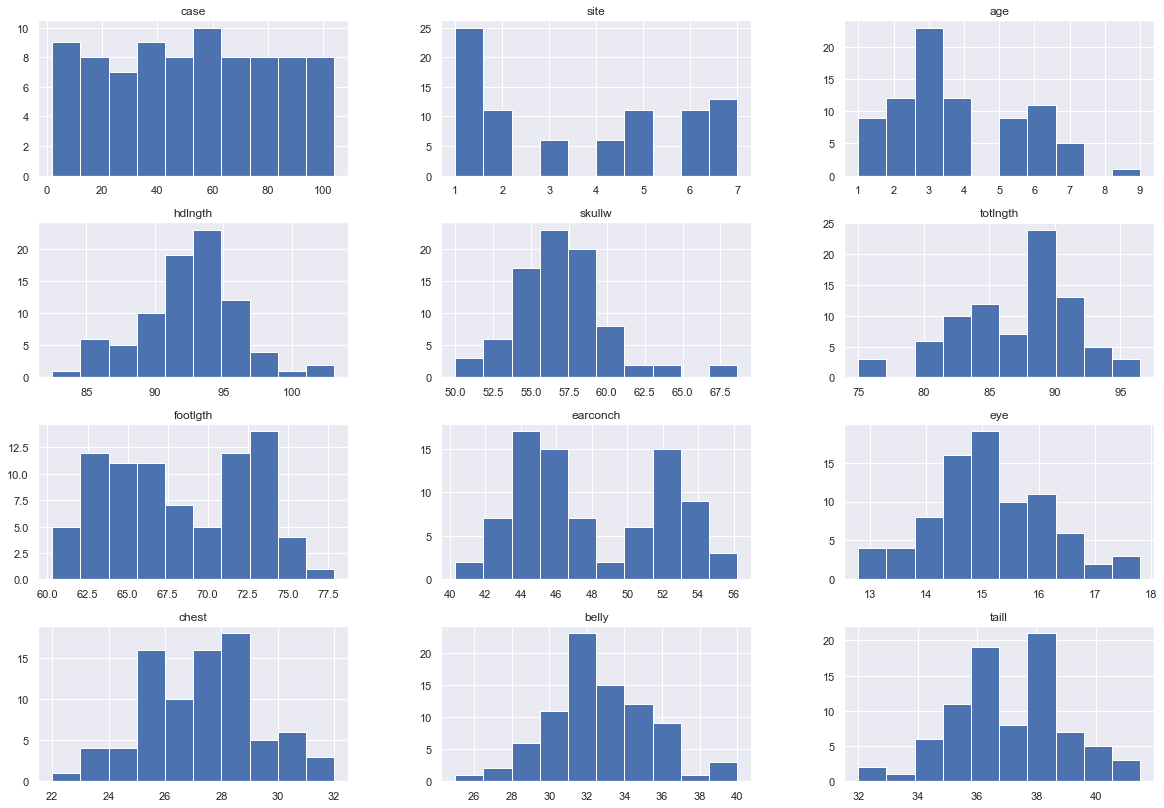

In [10]:
training_set.hist(figsize=(20,14))

### Pairplot

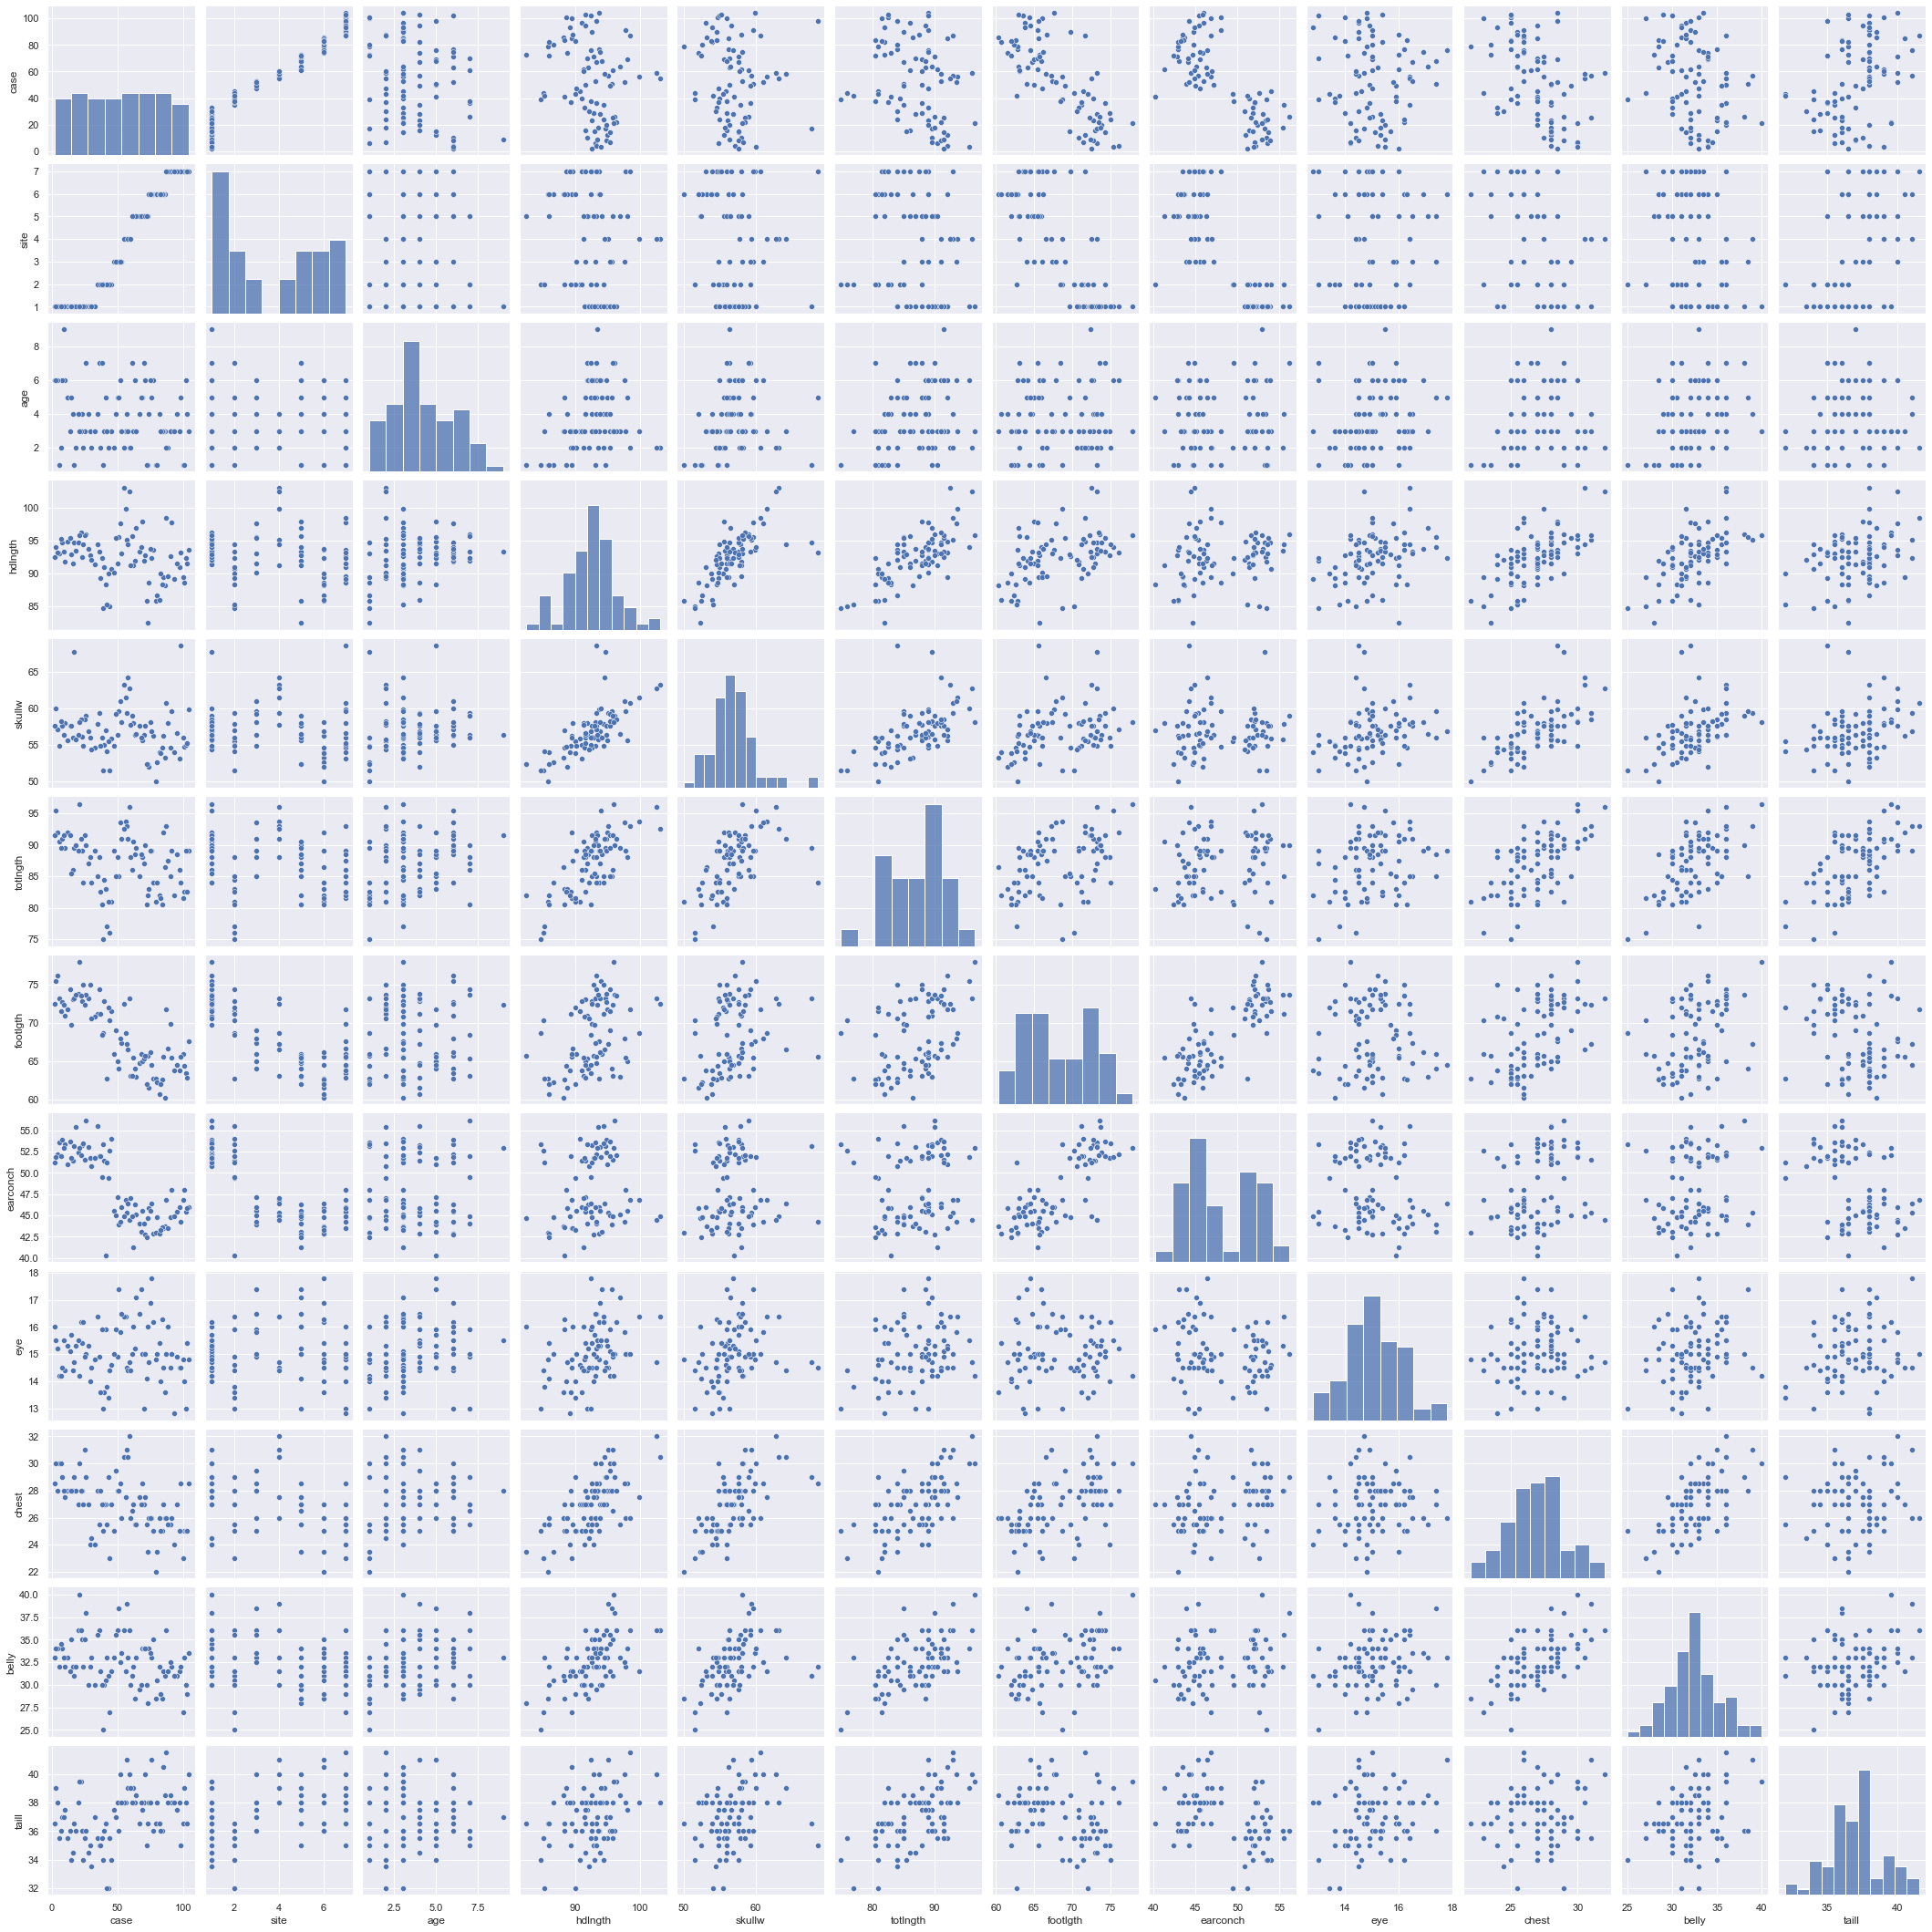

In [11]:
sns.pairplot(training_set)

---

# Step 3: Prepare the Data

### One-Hot Encode Categorical Features

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 92 to 54
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      80 non-null     int64  
 1   site      80 non-null     int64  
 2   Pop       80 non-null     object 
 3   sex       80 non-null     object 
 4   age       80 non-null     float64
 5   hdlngth   80 non-null     float64
 6   skullw    80 non-null     float64
 7   totlngth  80 non-null     float64
 8   footlgth  80 non-null     float64
 9   earconch  80 non-null     float64
 10  eye       80 non-null     float64
 11  chest     80 non-null     float64
 12  belly     80 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 8.8+ KB


In [29]:
# One hot encode categorical features for the X_train and X_test sets

X_train = pd.get_dummies(X_train, columns=['Pop', 'sex'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Pop', 'sex'], drop_first=True)

# see all columns
pd.set_option('display.max_columns', None)

X_train.head()

,case,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
92,93,7,3.0,89.2,54.0,82.0,63.8,44.9,12.8,24.0,31.0,1,1
26,27,1,2.0,90.5,54.5,85.0,70.3,50.8,14.2,23.0,28.0,0,0
44,45,2,3.0,90.7,55.9,81.0,71.5,54.0,14.6,27.0,31.5,0,1
73,74,6,4.0,88.7,52.0,83.0,61.5,45.9,14.7,26.0,34.0,1,0
15,16,1,4.0,91.6,56.0,86.0,73.0,51.4,14.4,28.0,32.0,0,1


### Check which features are continuous

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 92 to 54
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       80 non-null     int64  
 1   site       80 non-null     int64  
 2   age        80 non-null     float64
 3   hdlngth    80 non-null     float64
 4   skullw     80 non-null     float64
 5   totlngth   80 non-null     float64
 6   footlgth   80 non-null     float64
 7   earconch   80 non-null     float64
 8   eye        80 non-null     float64
 9   chest      80 non-null     float64
 10  belly      80 non-null     float64
 11  Pop_other  80 non-null     uint8  
 12  sex_m      80 non-null     uint8  
dtypes: float64(9), int64(2), uint8(2)
memory usage: 7.7 KB


### Feature Scaling on Continuous Features with Standardization

In [31]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

# Create a function to scale the train and test sets

def scaleCategoricalFeatures(X_data):
    

    # Select features to scale
    features = ["case", "site", "age", "hdlngth",
               "skullw", "totlngth", "footlgth",
               "footlgth", "earconch", "eye",
               "chest", "belly"]
    
    scaler = StandardScaler()

    X_data[features] = scaler.fit_transform(X_data[features])
    
    return X_data

X_train = scaleCategoricalFeatures(X_train)
X_test = scaleCategoricalFeatures(X_test)

print(X_train.shape)

(80, 13)


### Make sure it worked by seeing if Standard Deviations are 1

In [32]:
X_train.describe()

,case,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
count,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,80.00000,80.00000
mean,1.543904e-17,-1.231654e-17,-9.714451e-18,-2.775558e-17,-5.218048e-16,-1.276756e-16,2.446654e-15,-1.386391e-15,-1.640355e-15,3.663736e-16,-4.884981e-16,0.58750,0.58750
std,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,0.49539,0.49539
min,-1.710034e+00,-1.168627e+00,-1.513439e+00,-2.964882e+00,-2.213274e+00,-2.827806e+00,-1.822177e+00,-1.717010e+00,-2.077969e+00,-2.455495e+00,-2.638476e+00,0.00000,0.00000
25%,-8.910048e-01,-1.168627e+00,-5.632980e-01,-4.704160e-01,-5.808556e-01,-7.367921e-01,-8.590389e-01,-8.085056e-01,-5.970111e-01,-7.301785e-01,-5.381966e-01,0.00000,0.00000
50%,6.039308e-02,1.062388e-01,-4.275635e-01,1.063392e-01,-1.846376e-01,1.925476e-01,-1.381268e-01,-3.290173e-01,-1.342118e-01,9.242765e-03,-1.006384e-01,1.00000,1.00000
75%,8.132384e-01,9.561492e-01,6.583121e-01,5.821623e-01,3.621433e-01,7.733848e-01,8.942194e-01,9.643393e-01,6.294071e-01,7.486640e-01,5.119431e-01,1.00000,1.00000
max,1.665360e+00,1.381104e+00,2.830063e+00,2.975697e+00,3.682450e+00,2.167394e+00,2.238000e+00,2.043188e+00,2.550024e+00,1.981033e+00,2.612222e+00,1.00000,1.00000


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 92 to 54
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       80 non-null     float64
 1   site       80 non-null     float64
 2   age        80 non-null     float64
 3   hdlngth    80 non-null     float64
 4   skullw     80 non-null     float64
 5   totlngth   80 non-null     float64
 6   footlgth   80 non-null     float64
 7   earconch   80 non-null     float64
 8   eye        80 non-null     float64
 9   chest      80 non-null     float64
 10  belly      80 non-null     float64
 11  Pop_other  80 non-null     uint8  
 12  sex_m      80 non-null     uint8  
dtypes: float64(11), uint8(2)
memory usage: 7.7 KB


In [34]:
X_train.head()

,case,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
92,1.301347,1.381104,-0.427564,-1.032752,-0.945376,-1.201462,-1.014756,-0.808506,-2.077969,-1.469600,-0.538197,1,1
26,-0.882732,-1.168627,-0.970501,-0.657861,-0.786889,-0.504457,0.484741,0.680432,-0.782131,-1.962547,-1.588336,0,0
44,-0.287074,-0.743672,-0.427564,-0.600186,-0.343125,-1.433797,0.761572,1.487991,-0.411891,0.009243,-0.363173,0,1
73,0.672597,0.956149,0.115374,-1.176941,-1.579325,-0.969127,-1.545347,-0.556143,-0.319332,-0.483705,0.511943,1,0
15,-1.246745,-1.168627,0.115374,-0.340646,-0.311427,-0.272122,1.107609,0.831849,-0.597011,0.502190,-0.188150,0,1


---

# Step 4: Linear Regression


### Full Model

In [35]:
# select predictor variables and outcome variable for the model ---

X = X_train

y = y_train


# # To create and test interaction terms 

# X['Interaction_term'] = data['predictor_var'] * data['predictor_var2']


# build model ---------------------------------------

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# require a constant in the model summary
X = sm.add_constant(X)

# build the model and fit it to the data
linear_model = sm.OLS(y, X, hasconst=True)
linear_model = linear_model.fit()


print(linear_model.summary())

# NOTE: P-values are the probability the results are insignificant
# and due to random chance. 
# With Values lower than the alpha level (0.05), we can reject the null hypothesis

# NOTE: R-squared is the amount of variability within the outcome variable
# that is explained by our model

# NOTE: Interpreting coefficients
# If we hold all other features fixed, a one unit increase 
# in the predictor_variable is correlated with 
# an increase of (coefficient_number) for the outcome_variable

# Prob (F-statistic) = P-value of the model

                            OLS Regression Results                            
Dep. Variable:                  taill   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     14.01
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.66e-14
Time:                        10:14:27   Log-Likelihood:                -117.89
No. Observations:                  80   AIC:                             263.8
Df Residuals:                      66   BIC:                             297.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4617      0.704     50.373      0.0

### Backwards Elimination: Refit model with features of below 0.05 p-value

In [37]:
# select predictor variables and outcome variable for the model ---

features = ["hdlngth", "totlngth", "Pop_other"]

X = X_train[features]

y = y_train

# require a constant in the model summary
X = sm.add_constant(X)

# build the model and fit it to the data
linear_model = sm.OLS(y, X, hasconst=True)
linear_model = linear_model.fit()


print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  taill   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     57.45
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.69e-19
Time:                        10:15:43   Log-Likelihood:                -123.49
No. Observations:                  80   AIC:                             255.0
Df Residuals:                      76   BIC:                             264.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6004      0.203    175.512      0.0

---

# Step 5: Ridge Regression
    
### GridSearchCV - Ridge

### Optimized Ridge Model

### GridSearchCV - Lasso

### Optimized Lasso Model

--- 
# Test Set Accuracy

---

# Final Conclusion
